In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
conn = sqlite3.connect('/content/drive/MyDrive/Pacmann/olist.db')

In [ ]:
# Mendapatkan daftar nama table di database
cursor = conn.cursor()
cursor.execute("SELECT tbl_name FROM sqlite_master WHERE type='table';")
table_names = cursor.fetchall()
table_names = [table[0] for table in table_names]
print("Table names:", table_names)

Table names: ['olist_order_customer_dataset', 'olist_order_dataset', 'olist_order_reviews_dataset', 'olist_order_payments_dataset', 'olist_order_items_dataset', 'olist_products_dataset', 'olist_sellers_dataset', 'olist_geolocation_dataset', 'product_category_name_translation']


Pada tugas akhir ini, fokus yang dipilih adalah analisa penjualan. Hal pertama yang ingin dilakukan terkait penjualan adalah total penjualan. Total penjualan didapatkan dengan menghitung total pendapatan yang dihasilkan dari penjualan produk. Table yang dilihat untuk melakukan analisa penjualan adalah **order_items** dan **order_payments**.

In [ ]:
#data understanding untuk table order_items

table_order_items = 'olist_order_items_dataset'
# Query to retrieve data from the specified table
query = f"SELECT * FROM {table_order_items}"

# Read data into a DataFrame
df_order_items = pd.read_sql(query, conn)
df_order_items.head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
#identifikasi data pada tabel order_items apakah memiliki kolom yang memiliki miising values
df_order_items_nan_counts = df_order_items.isna().sum()
print(df_order_items_nan_counts)


index                  0
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [ ]:
#data understanding untuk table order_payments

table_order_payments = 'olist_order_payments_dataset'
# Query to retrieve data from the specified table
query = f"SELECT * FROM {table_order_payments}"

# Read data into a DataFrame
df_order_payments = pd.read_sql(query, conn)
df_order_payments.head()

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
#identifikasi data pada tabel order_payments apakah memiliki kolom yang memiliki miising values
df_order_payments_nan_counts = df_order_payments.isna().sum()
print(df_order_payments_nan_counts)

index                   0
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


Setelah dilakukan ekspolari dari tabel **order_items** dan **order_payments**, telihat bahwa tidak ada kolom yang memiliki nilai missing values sehingga tidak perlu dilakukan imputasi. Karena tipe data nya sudah float, maka tidak perlu dikonversi lagi. selanjutnya untuk menganalisa total penjualan kita gabungkan tabel **order_items** dan **order_payments**,

In [ ]:
print(df_order_items['price'].dtype)

float64


In [ ]:
# Gabungkan tabel df_order_items_cleaned dan df_order_payments berdasarkan order_id
df_merged = pd.merge(df_order_items, df_order_payments, on="order_id")

In [ ]:
df_merged.head()

,index_x,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index_y,payment_sequential,payment_type,payment_installments,payment_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,85283,1,credit_card,2,72.19
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2499,1,credit_card,3,259.83
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,12393,1,credit_card,5,216.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,32971,1,credit_card,2,25.78
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,98711,1,credit_card,3,218.04


In [ ]:
# Hitung total pendapatan untuk setiap pesanan
df_merged["total_revenue"] = df_merged["payment_value"]

In [ ]:
df_merged.head()

,index_x,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index_y,payment_sequential,payment_type,payment_installments,payment_value,total_revenue
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,85283,1,credit_card,2,72.19,72.19
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2499,1,credit_card,3,259.83,259.83
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,12393,1,credit_card,5,216.87,216.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,32971,1,credit_card,2,25.78,25.78
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,98711,1,credit_card,3,218.04,218.04


In [ ]:
# Hitung total penjualan keseluruhan
total_sales = df_merged["total_revenue"].sum().round(3)

print("Total Penjualan Keseluruhan:", total_sales)

Total Penjualan Keseluruhan: 20308134.71


Total penjualan keseluruhan sebesar **20.308.134,71**. Setelah mengetahui total penjualan keseluruhan, selanjutnya kita melakukan evaluasi  total pendapatan penjualan dari seluruh produk dan kategori. Untuk melakukan hal tersebut dapat dilakukan dengan mengacu pada table **order_items**, **order_payments** dan table **products**. Karena sebelumnya kita sudah memeriksa kondisi data pada tabel **order_items** maka pada tahapan ini kita juga perlu memeriksa kondisi data pada tabel **products**.

In [ ]:
#data understanding pada table products

table_products = 'olist_products_dataset'
# Query to retrieve data from the specified table
query = f"SELECT * FROM {table_products}"

# Read data into a DataFrame
df_products = pd.read_sql(query, conn)
df_products.head()

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
#identifikasi apakah table products memiliki missing values
df_products_nan_counts = df_products.isna().sum()
print(df_products_nan_counts)

index                           0
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


Pada table product, terdapat banyak kolom yang memiliki missing values. Untuk itu perlu dilakukan data cleaning terhadap baris yang memiliki missing values. Untuk mengatasi baris yang memiliki missing values, pada tugas ini dilakukan pendekatan mengganti nilai kosong dengan nilai unknown atau nilai lain. Hal ini dilakukan berdasarkan pertimbangan agar Tetap mempertahankan jumlah baris yang sama, sehingga data tidak menjadi lebih sedikit, menjaga integritas dataset dan membantu mengidentifikasi data yang tidak lengkap. Untuk kolom **‘product_category_name’** akan diganti dengan nilai **“unknown”**. Sedangkan untuk kolom **‘product_name_lenght’**, **‘product_description_lenght’**, **‘product_photos_qty’** , **‘product_weight_g’**, **‘product_length_cm’**, **‘product_height_cm’**, **‘product_width_cm’** akan diisi dengan nilai rata – rata atau median dari kolom tersebut. Hal ini dilakukan untuk menjaga distribusi data dan menghindari bias.

In [ ]:
# Mengganti nilai kosong pada kolom product_category_name dengan "Unknown"
df_products["product_category_name"].fillna("Unknown", inplace=True)

# Mengisi nilai kosong pada kolom numerik dengan median
numeric_columns = ["product_name_lenght", "product_description_lenght", "product_photos_qty",
                   "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]
for column in numeric_columns:
    median_value = df_products[column].median()
    df_products[column].fillna(median_value, inplace=True)

In [ ]:
#setelah dilakukan data cleaning, maka tidak ada lagi kolom yang memiliki missing values
df_products_nan_counts = df_products.isna().sum()
print(df_products_nan_counts)

index                         0
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [ ]:
# Gabungkan tabel df_order_items_cleaned, df_products_cleaned, dan df_order_payments
df_merged = pd.merge(df_order_items, df_products, on="product_id")
df_merged = pd.merge(df_merged, df_order_payments, on="order_id")

In [ ]:
# Kelompokkan data berdasarkan kategori produk dan product_id
category_product_revenue = df_merged.groupby(["product_category_name", "product_id"])["payment_value"].sum()

# Kelompokkan data berdasarkan kategori produk saja
category_revenue = df_merged.groupby("product_category_name")["payment_value"].sum()

# Urutkan hasil berdasarkan total pendapatan terbesar
category_revenue = category_revenue.sort_values(ascending=False)

print("Total Pendapatan Penjualan per Kategori:")
print(category_revenue)

Total Pendapatan Penjualan per Kategori:
product_category_name
cama_mesa_banho                  1712553.67
beleza_saude                     1657373.12
informatica_acessorios           1585330.45
moveis_decoracao                 1430176.39
relogios_presentes               1429216.68
                                    ...    
pc_gamer                            2174.43
casa_conforto_2                     1710.54
cds_dvds_musicais                   1199.43
fashion_roupa_infanto_juvenil        785.67
seguros_e_servicos                   324.51
Name: payment_value, Length: 74, dtype: float64


In [ ]:
category_revenue.head()

product_category_name
cama_mesa_banho           1712553.67
beleza_saude              1657373.12
informatica_acessorios    1585330.45
moveis_decoracao          1430176.39
relogios_presentes        1429216.68
Name: payment_value, dtype: float64

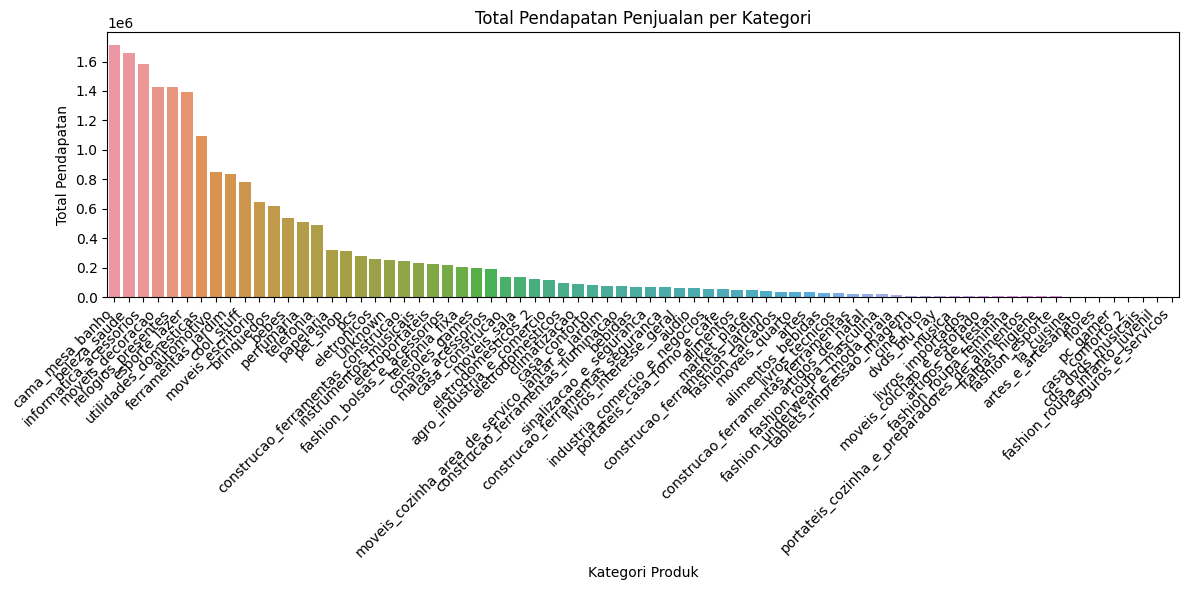

In [ ]:
# Menampilkan grafik penjualan per kategori dengan Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=category_revenue.reset_index(), x="product_category_name", y="payment_value")
plt.title("Total Pendapatan Penjualan per Kategori")
plt.xlabel("Kategori Produk")
plt.ylabel("Total Pendapatan")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Berdasarkan total pendapatan penjualan per kategori, 5 kategori product yang memberikan pendapatan penjualan tertinggi adalah

1. cama_mesa_banho 1712553.67
2. beleza_saude 1657373.12
3. informatica_acessorios 1585330.45
4. moveis_decoracao 1430176.39
5. relogios_presentes 1429216.68

Dan 5 kategori produk dengan pendapatan penjualan terendah adalah
1. pc_gamer 2174.43
2. casa_conforto_2 1710.54
3. cds_dvds_musicais 1199.43
4. fashion_roupa_infanto_juvenil 785.67
5. eguros_e_servicos 324.51


Selanjutnya kita identifikasi trend kenaikan atau penurunan pendapatan dari waktu ke waktu. Untuk menganalisa trend akan digunakan data dari table **order_items**, **products**, **order_payments** dan **orders**. Dari tabel yang akan digunakan, hanya table **orders** yang belum dipastikan kondisi data nya. Untuk itu dilakukan pengecekan terhadap kondisi data pada tabel order.

In [ ]:
#Data understanding pada table orders
table_order= 'olist_order_dataset'

# Query to retrieve data from the specified table
query = f"SELECT * FROM {table_order}"

# Read data into a DataFrame
df_order = pd.read_sql(query, conn)
df_order.head()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
#Identifikasi missing values pada kolom yang ada di table orders
df_order_nan_counts = df_order.isna().sum()
print(df_order_nan_counts)

index                               0
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


Pada tabel order, terdapat 3 buah kolom yang memiliki missing values yaitu kolom **‘order_approved_at’**  ,             **‘order_delivered_carrier_date’** dan **‘order_delivered_customer_date’**. Selanjutnya adalah melakukan cleaning pada table **orders**. Kolom yang memiliki missing values tersebut memiliki tipe data object, maka pada tahapan cleaning dilakukan konversi menjadi format data datetime selanjutnya mencari nilai median dari kolom tersebut dan mengisikan nilai median pada data yang kosong.

In [ ]:
#Konversi data pada kolom yang memiliki nilai variable waktu
df_order['order_purchase_timestamp'] = pd.to_datetime(df_order['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
df_order['order_approved_at'] = pd.to_datetime(df_order['order_approved_at'], format='%Y-%m-%d %H:%M:%S')
df_order['order_delivered_carrier_date'] = pd.to_datetime(df_order['order_delivered_carrier_date'], format='%Y-%m-%d %H:%M:%S')
df_order['order_delivered_customer_date'] = pd.to_datetime(df_order['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')
df_order['order_estimated_delivery_date'] = pd.to_datetime(df_order['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
#Identifikasi missing values pada kolom yang ada di table orders
df_order_nan_counts = df_order.isna().sum()
print(df_order_nan_counts)

index                               0
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [ ]:
#imputasi data pada kolom yang memiliki missing values
median_approved_at = df_order['order_approved_at'].median()
df_order['order_approved_at'].fillna(median_approved_at, inplace=True)

median_order_delivered_carrier_date = df_order['order_delivered_carrier_date'].median()
df_order['order_delivered_carrier_date'].fillna(median_order_delivered_carrier_date, inplace=True)

median_order_delivered_customer_date = df_order['order_delivered_customer_date'].median()
df_order['order_delivered_customer_date'].fillna(median_order_delivered_customer_date, inplace=True)

In [ ]:
#Identifikasi missing values pada kolom yang ada di table orders
df_order_nan_counts = df_order.isna().sum()
print(df_order_nan_counts)

index                            0
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [ ]:
#identifikasi tipe data pada kolom yang memiliki variable waktu
print(df_order['order_purchase_timestamp'].dtype)
print(df_order['order_approved_at'].dtype)
print(df_order['order_delivered_carrier_date'].dtype)
print(df_order['order_delivered_customer_date'].dtype)
print(df_order['order_estimated_delivery_date'].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [ ]:
print("Nilai median yang digunakan di kolom approved_at:", median_approved_at)
print("Nilai median yang digunakan di kolom order_delivered_carrier_date:", median_order_delivered_carrier_date)
print("Nilai median yang digunakan di kolom order_delivered_customer_date:", median_order_delivered_customer_date)

Nilai median yang digunakan di kolom approved_at: 2018-01-19 11:36:13
Nilai median yang digunakan di kolom order_delivered_carrier_date: 2018-01-24 16:10:58
Nilai median yang digunakan di kolom order_delivered_customer_date: 2018-02-02 19:28:10.500000


Setelah imputasi, maka tidak ada lagi kolom yang memiliki missing values. selanjutnya kita identifikasi trend kenaikan atau penurunan pendapatan dari waktu ke waktu. Langkah pertama yang dilakukan adalah dengan menggabungkan table **order_items**, **products**, **order_payments** dan **orders**.

In [ ]:
# Gabungkan table order_items, products, order_payments dan order
df_merged = pd.merge(df_order_items, df_products, on="product_id")
df_merged = pd.merge(df_merged, df_order_payments, on="order_id")
df_merged = pd.merge(df_merged, df_order, on="order_id")

<ipython-input-111-6eeee81bdaf5>:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'index_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged = pd.merge(df_merged, df_order, on="order_id")


In [ ]:
#menghitung pendapatan bulanan
monthly_revenue = df_merged.groupby(df_merged["order_purchase_timestamp"].dt.to_period("M"))["payment_value"].sum()

In [ ]:
monthly_revenue.head()

order_purchase_timestamp
2016-09       347.52
2016-10     73914.58
2016-12        19.62
2017-01    187779.41
2017-02    344134.79
Freq: M, Name: payment_value, dtype: float64

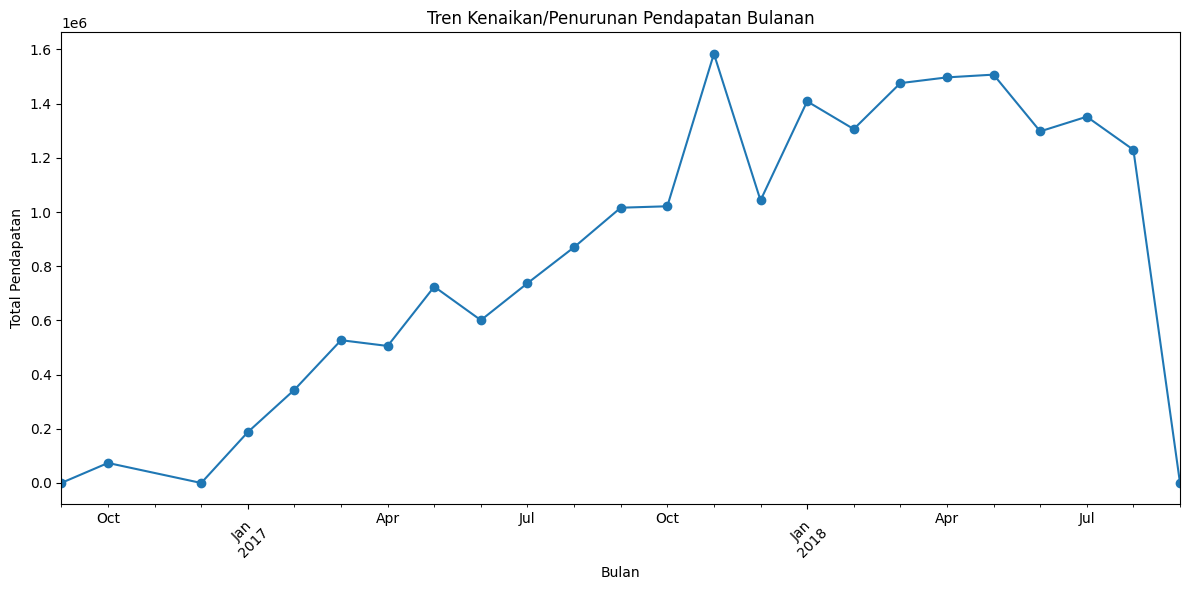

In [ ]:
#visualisasi trend kenaikan/penuruna pendapatan bulanan
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind="line", marker="o")
plt.title("Tren Kenaikan/Penurunan Pendapatan Bulanan")
plt.xlabel("Bulan")
plt.ylabel("Total Pendapatan")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
highest_revenue_month = monthly_revenue.idxmax()
highest_revenue = monthly_revenue.max()

print("Bulan dengan Pendapatan Tertinggi:", highest_revenue_month)
print("Pendapatan Tertinggi:", highest_revenue)

lowest_revenue_month = monthly_revenue.idxmin()
lowest_revenue = monthly_revenue.min()

print("Bulan dengan Pendapatan Terendah:", lowest_revenue_month)
print("Pendapatan Terendah:", lowest_revenue)

Bulan dengan Pendapatan Tertinggi: 2017-11
Pendapatan Tertinggi: 1583869.01
Bulan dengan Pendapatan Terendah: 2016-12
Pendapatan Terendah: 19.62


Pada grafik di atas dapat dilihat trend kenaikan/penurunan pendapatan bulanan. Dapat dilihat bahwa trend mengalami **kenaikan pendapatan mulai dari desember 2016 – mei 2018** dengan **pendapatan tertinggi diperoleh pada bulan November 2017 sebesar 1.583.869,01**. **Penurunan trend pendapatan terjadi sejak juni 2018**. Untuk melihat penyebab penurunan pendapatan ini dapat dilakukan analisa produk untuk melihat apakah ada produk atau kategori tertentu yang mengalami penurunan penjualan yang signifikan. Langkah pertama adalah membuat filter untuk periode sebelum penurunan dan setelah penurunan.

In [ ]:
# Filter data untuk periode sebelum penurunan (Desember 2016 - Mei 2018)
before_downturn = df_merged.loc[df_merged['order_purchase_timestamp'] < '2018-06-01']

# Filter data untuk periode setelah penurunan (Juni 2018 dan seterusnya)
after_downturn = df_merged.loc[df_merged['order_purchase_timestamp'] >= '2018-06-01']

In [ ]:
total_revenue_before = before_downturn['payment_value'].sum().round(3)
total_revenue_after = after_downturn['payment_value'].sum().round(3)
print("Total Pendapatan Sebelum Penurunan:", total_revenue_before)
print("Total Pendapatan Setelah Penurunan:", total_revenue_after)

Total Pendapatan Sebelum Penurunan: 16429024.38
Total Pendapatan Setelah Penurunan: 3879110.33


Didapatkan hasil **Total Pendapatan Sebelum Penurunan sebesar 16.429.024,380** dan **total pendapatan setelah penurunan sebesar 3.879.110,33**. Selanjutnya kita ingin mengetahui produk yang mengalami kenaikan dan penurunan penjualan terbesar antara periode kenaikan dan penurunan. Langkah yang harus dilakukan adalah menghitung total pendapatan per kategori untuk masing – masing periode.

In [ ]:
# Menghitung total pendapatan per kategori untuk periode before_downturn
total_revenue_by_category_before = before_downturn.groupby("product_category_name")["payment_value"].sum()

# Menghitung total pendapatan per kategori untuk periode after_downturn
total_revenue_by_category_after = after_downturn.groupby("product_category_name")["payment_value"].sum()

# Menghitung penurunan penjualan per kategori
revenue_change_by_category = total_revenue_by_category_after - total_revenue_by_category_before

In [ ]:
# Mencari kategori dengan kenaikan penjualan terbesar
category_with_largest_increase = revenue_change_by_category.idxmax()
largest_increase = revenue_change_by_category.max().round(3)

# Mencari kategori dengan penurunan penjualan terbesar
category_with_largest_decrease = revenue_change_by_category.idxmin()
largest_decrease = revenue_change_by_category.min().round(3)

print("Kategori dengan Kenaikan Terbesar:", category_with_largest_increase)
print("Kenaikan Terbesar:", largest_increase)

print("Kategori dengan Penurunan Terbesar:", category_with_largest_decrease)
print("Penurunan Terbesar:", largest_decrease)

Kategori dengan Kenaikan Terbesar: sinalizacao_e_seguranca
Kenaikan Terbesar: 30984.67
Kategori dengan Penurunan Terbesar: informatica_acessorios
Penurunan Terbesar: -1200703.53


Didapatkan bahwa kenaikan penjualan terbesar didapatkan oleh **kategori sinalizacao_e_seguranca** dengan kenaikan sebesar **30.984,67** dan penurunan penjualan terbesar didapatkan oleh **kategori informatica_acessorios** dengan penurunan sebesar **-1.200.703,53**. Selanjutnya kita perlu mengetahui produk apa yang memberikan kontribusi terbesar pada pendapatan penjualan saat periode before_downturn dan after_downturn. Hal pertama yang kita lakukan adalah menghitung total pendapatan per produk untuk masing – masing periode.

In [ ]:
# Menghitung total pendapatan per produk untuk periode before_downturn
total_revenue_by_product_before = before_downturn.groupby("product_id")["payment_value"].sum()

# Menghitung total pendapatan per produk untuk periode after_downturn
total_revenue_by_product_after = after_downturn.groupby("product_id")["payment_value"].sum()

In [ ]:
# Mencari produk dengan kontribusi terbesar pada pendapatan untuk periode before_downturn
product_with_largest_contribution_before = total_revenue_by_product_before.idxmax()
largest_contribution_before = total_revenue_by_product_before.max().round(3)

# Mencari produk dengan kontribusi terbesar pada pendapatan untuk periode after_downturn
product_with_largest_contribution_after = total_revenue_by_product_after.idxmax()
largest_contribution_after = total_revenue_by_product_after.max().round(3)

print("Produk dengan Kontribusi Terbesar sebelum Penurunan:", product_with_largest_contribution_before)
print("Kontribusi Terbesar sebelum Penurunan:", largest_contribution_before)

print("Produk dengan Kontribusi Terbesar setelah Penurunan:", product_with_largest_contribution_after)
print("Kontribusi Terbesar setelah Penurunan:", largest_contribution_after)

Produk dengan Kontribusi Terbesar sebelum Penurunan: 5769ef0a239114ac3a854af00df129e4
Kontribusi Terbesar sebelum Penurunan: 109312.64
Produk dengan Kontribusi Terbesar setelah Penurunan: e7cc48a9daff5436f63d3aad9426f28b
Kontribusi Terbesar setelah Penurunan: 45469.84


In [ ]:
table_category_name = 'product_category_name_translation'
# Query to retrieve data from the specified table
query = f"SELECT * FROM {table_category_name}"

# Read data into a DataFrame
df_category_name = pd.read_sql(query, conn)


In [ ]:
# Gabungkan data produk dengan data kategori
df_products_with_category = pd.merge(df_products, df_category_name, on="product_category_name")
def find_product_category(product_id):
    # Mencari kategori produk dengan ID tertentu
    category_of_product = df_products_with_category[df_products_with_category["product_id"] == product_id]["product_category_name_english"].iloc[0]
    return category_of_product

In [ ]:
# ID produk yang ingin dicari kategori nya
product_id_to_find = "5769ef0a239114ac3a854af00df129e4"

# Memanggil fungsi dan mencetak hasil
category_of_product = find_product_category(product_id_to_find)
print("Kategori Produk dengan ID", product_id_to_find, "adalah:", category_of_product)

Kategori Produk dengan ID 5769ef0a239114ac3a854af00df129e4 adalah: fixed_telephony


In [ ]:
# ID produk yang ingin dicari kategori nya
product_id_to_find = "e7cc48a9daff5436f63d3aad9426f28b"

# Memanggil fungsi dan mencetak hasil
category_of_product = find_product_category(product_id_to_find)
print("Kategori Produk dengan ID", product_id_to_find, "adalah:", category_of_product)

Kategori Produk dengan ID e7cc48a9daff5436f63d3aad9426f28b adalah: telephony


Produk dengan Kontribusi Terbesar sebelum Penurunan adalah **5769ef0a239114ac3a854af00df129e4** yang masuk pada kategori **fixed_telephony** dengan Kontribusi Terbesar pada pendapatan sebelum terjadi trend Penurunan sebesar 109.312,64. Sedangkan, produk dengan kontribusi terbesar pada pendapatan setelah terjadi trend penurunan adalah **e7cc48a9daff5436f63d3aad9426f28b** yang masuk pada kategori **telephony** dengan kontribusi terbesar pada pendapatan setelah terjadi trend penurunan sebesar **45.469,84**


In [ ]:
# ID produk yang ingin dicari deskripsinya
product_id_to_find = "e7cc48a9daff5436f63d3aad9426f28b"

# Filter DataFrame berdasarkan ID produk
product_description = df_products[df_products["product_id"] == product_id_to_find]["product_description_lenght"].iloc[0]

print("Deskripsi Produk dengan ID", product_id_to_find, "adalah:", product_description)


Deskripsi Produk dengan ID e7cc48a9daff5436f63d3aad9426f28b adalah: 1500.0


Selanjutnya kita perlu mencari kategori mana produk yang memberikan kontribusi terbesar pada pendapatan penjualan saat periode before_downturn dan after_downturn. Kita dapat langsung menghitung pendapatan per kategori pada periode before_downturn dan after_downturn.

In [ ]:
# Menghitung total pendapatan per kategori untuk periode before_downturn
total_revenue_by_category_before = before_downturn.groupby("product_category_name")["payment_value"].sum()

# Menghitung total pendapatan per kategori untuk periode after_downturn
total_revenue_by_category_after = after_downturn.groupby("product_category_name")["payment_value"].sum()

In [ ]:
# Mencari kategori dengan kontribusi terbesar pada pendapatan untuk periode before_downturn
category_with_largest_contribution_before = total_revenue_by_category_before.idxmax()
largest_contribution_before = total_revenue_by_category_before.max()

# Mencari kategori dengan kontribusi terbesar pada pendapatan untuk periode after_downturn
category_with_largest_contribution_after = total_revenue_by_category_after.idxmax()
largest_contribution_after = total_revenue_by_category_after.max()

print("Kategori dengan Kontribusi Terbesar sebelum Penurunan:", category_with_largest_contribution_before)
print("Kontribusi Terbesar sebelum Penurunan:", largest_contribution_before)

print("Kategori dengan Kontribusi Terbesar setelah Penurunan:", category_with_largest_contribution_after)
print("Kontribusi Terbesar setelah Penurunan:", largest_contribution_after)

Kategori dengan Kontribusi Terbesar sebelum Penurunan: cama_mesa_banho
Kontribusi Terbesar sebelum Penurunan: 1396714.75
Kategori dengan Kontribusi Terbesar setelah Penurunan: beleza_saude
Kontribusi Terbesar setelah Penurunan: 451610.27


Kategori **cama_mesa_banho** memberikan kontribusi terbesar dalam hal pendapatan penjualan sebelum periode penurunan yaitu sebesar 1.396.714,75 dan kategori **beleza_saude** memberikan kontribusi terbesar dalam hal pendapatan penjualan setelah periode penurunan yaitu sebesar 451.610,27

Selanjutnya kita perlu mengidentifikasi daerah yang  memberikan kontribusi terbesar pada penjualan. Untuk melakukan hal tersebut perlu menggabungkan beberapa tabel yaitu (**order_items**, **order_payments**, **order_customer** dan **geolocation**). Karena data nya terlalu besar dan saya tidak bisa menjalankan nya di komputer atau menggunakan google colab, maka saya lakukan sampling pada data tersebut menjadi 30%. Sampling dilakukan secara random dan hanya mengambil 30% dari data keseluruhan. Sebelum melakukan analisa tersebut, kita periksa dulu table **order_customer** dan **geolocation**.

In [ ]:
table_name = 'olist_order_customer_dataset'

# Query to retrieve data from the specified table
query = f"SELECT * FROM {table_name}"

# Read data into a DataFrame
df_order_customer = pd.read_sql(query, conn)
df_order_customer_nan_counts = df_order_customer.isna().sum()
print(df_order_customer_nan_counts)

index                       0
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [ ]:
table_geolocation = 'olist_geolocation_dataset'
# Query to retrieve data from the specified table
query = f"SELECT * FROM {table_geolocation}"

# Read data into a DataFrame
df_geolocation = pd.read_sql(query, conn)

df_geolocation_nan_counts = df_geolocation.isna().sum()
print(df_geolocation_nan_counts)

index                          0
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


Karena pada table order_customer dan geolocation tidak memiliki kolom yang terdapat missing values. Selanjutnya dapat dihitung total pendapatan per daerah selanjutnya adalah mencari daerah dengan kontribusi terbesar pada pendapatan penjualan. Didaptkan daerah yang memberikan kontribusi total pendapatan terbesar adalah **Rio de Janeiro**

In [ ]:
# Mengambil contoh data (misalnya, 30% dari total data)
sample_size = int(len(df_merged) * 0.3)
df_sample = df_merged.sample(sample_size)

# Menggabungkan data penjualan dengan data pelanggan berdasarkan customer_id
df_sales_with_customer = pd.merge(df_sample, df_order_customer, on="customer_id", how="left")

# Menggabungkan data penjualan dengan data lokasi berdasarkan customer_zip_code_prefix
df_sales_with_location = pd.merge(df_sales_with_customer, df_geolocation, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="left")

# Menghitung total pendapatan per daerah
total_revenue_by_location = df_sales_with_location.groupby(["geolocation_city", "geolocation_state"])["payment_value"].sum()

# Mencari daerah dengan kontribusi terbesar pada pendapatan
location_with_largest_contribution = total_revenue_by_location.idxmax()
largest_contribution = total_revenue_by_location.max()

print("Daerah dengan Kontribusi Terbesar:", location_with_largest_contribution)
print("Kontribusi Terbesar:", largest_contribution)

<ipython-input-131-f7d3ada1816f>:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'index_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_sales_with_location = pd.merge(df_sales_with_customer, df_geolocation, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="left")


Daerah dengan Kontribusi Terbesar: ('rio de janeiro', 'RJ')
Kontribusi Terbesar: 134723349.19
